<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project5:-Customer-segmentation-of-e-commerce-website" data-toc-modified-id="Project5:-Customer-segmentation-of-e-commerce-website-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project5: Customer segmentation of e-commerce website</a></span></li><li><span><a href="#Cluestering" data-toc-modified-id="Cluestering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cluestering</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#CAH" data-toc-modified-id="CAH-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CAH</a></span></li></ul></li><li><span><a href="#Other" data-toc-modified-id="Other-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Other</a></span></li></ul></div>

## Project5: Customer segmentation of e-commerce website
***
The objective of this project is to determine different type of Olists' users using unsupervized algorithms.

This project will be divided into two notebooks:  
- One for the data analysis
- One dedicated to the customer segmentation

The data set can be found here:  
https://www.kaggle.com/olistbr/brazilian-ecommerce

The following notebook is dedicated to the cluestering

Usefull ressources
https://www.kaggle.com/dmitryleshchinskiy/customer-segmentation-k-means-optics

**Packages and DF imported**

In [50]:
import numpy as np
import pandas as pd

from datetime import datetime

from sklearn import metrics
from sklearn import model_selection, preprocessing

from sklearn import manifold, cluster
from sklearn.decomposition import PCA

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# Graphical libraries
# %pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('data/cleaned_dataframe.csv')

## Cluestering

k-means, CAH, DBSCAN
https://www.definitions-marketing.com/definition/segmentation-rfm/
RFM Marketing

- *types de paiements*
- *payment_installments*
- *categories de produits*
- montants moyens min, max de commandes, de produits

indice de Calinski-Harabasz à checker
https://marcellodelbono.it/en/rfm-segmentation-of-your-customer-base/

### Preprocessing

Due to the high complexity for most cluesting algorithms, we will only take a sample of the original dataframe. Plus we will standardize our features, so that each will have the same weight.

In [62]:
#Take only a sample
N = 1000
#Get the same randomize selection
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
idx_random = rndperm[:N]
X = df.iloc[idx_random,:].copy()
X.shape

(1000, 56)

In [63]:
#Standardization
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

# del data_set
X_std.shape

(1000, 56)

### CAH

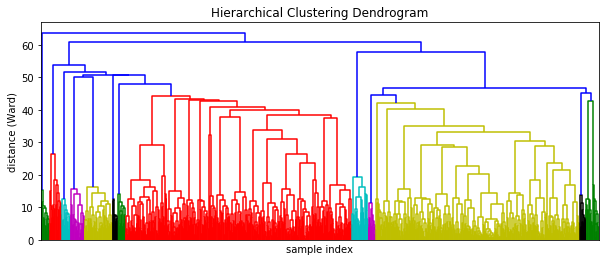

In [66]:
# Calculate the distance between each sample
Z = hierarchy.linkage(X_std, 'ward')

# Make the dendrogram
plt.figure(figsize=(10,4))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.xticks([])
plt.show()

In [38]:
model.n_clusters_

2

**PCA**

In [46]:
# df_subset = df.copy()
# #Test of a PCA
# pca = PCA(n_components=10)
# pca_result = pca.fit_transform(X_std)
# df_subset['pca-one'] = pca_result[:,0]
# df_subset['pca-two'] = pca_result[:,1] 
# df_subset['pca-three'] = pca_result[:,2]
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
# fig = px.scatter_3d(df_subset.reset_index(), x='pca-one', y='pca-two', z='pca-three',
#                     color='review_score', labels={'color':'review_score'}, hover_data=['review_score'])
# fig.update_layout(title="PCA colored by review_score")
# fig.show()

In [67]:
df_subset1 = X.copy()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=300, init='pca')
X_tsne = tsne.fit_transform(X_std)

df_subset1['tsne-2d-one'] = X_tsne[:,0]
df_subset1['tsne-2d-two'] = X_tsne[:,1]

In [68]:
fig = px.scatter(df_subset1.reset_index(), x='tsne-2d-one', y='tsne-2d-two',
                    color='review_score', labels={'color':'order_delivery_time'}, 
                 hover_data=['order_estimated_delivery_vs_actual'])
fig.update_layout(title="TSNE colored by review_score")
fig.show()

In [ ]:
# #Compare pca & tsne
# plt.figure(figsize=(16,4))
# ax1 = plt.subplot(1, 2, 1)
# sns.scatterplot(
#     x="pca-one", y="pca-two",
#     hue='review_score',
#     data=df_subset,
#     legend="full",
#     alpha=0.3,
#     ax=ax1
# )
# ax2 = plt.subplot(1, 2, 2)
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue='review_score',
#     data=df_subset1,
#     legend="full",
#     alpha=0.3,
#     ax=ax2
# )
# plt.tight_layout()
# # ax3 = plt.subplot(1, 3, 3)
# # sns.scatterplot(
# #     x="tsne-pca50-one", y="tsne-pca50-two",
# #     hue="y",
# #     palette=sns.color_palette("hls", 10),
# #     data=df_subset,
# #     legend="full",
# #     alpha=0.3,
# #     ax=ax3
# # )

## Other

Plot Dendogram

In [25]:
# def get_distances(X,model,mode='l2'):
#     distances = []
#     weights = []
#     children=model.children_
#     dims = (X.shape[1],1)
#     distCache = {}
#     weightCache = {}
    
#     for childs in children:
#         c1 = X[childs[0]].reshape(dims)
#         c2 = X[childs[1]].reshape(dims)
#         c1Dist = 0
#         c1W = 1
#         c2Dist = 0
#         c2W = 1
#         if childs[0] in distCache.keys():
#             c1Dist = distCache[childs[0]]
#             c1W = weightCache[childs[0]]
#         if childs[1] in distCache.keys():
#             c2Dist = distCache[childs[1]]
#             c2W = weightCache[childs[1]]
#         d = np.linalg.norm(c1-c2)
#         cc = ((c1W*c1)+(c2W*c2))/(c1W+c2W)

#         X = np.vstack((X,cc.T))

#         newChild_id = X.shape[0]-1

#         # How to deal with a higher level cluster merge with lower distance:
#         if mode=='l2':  # Increase the higher level cluster size suing an l2 norm
#             added_dist = (c1Dist**2+c2Dist**2)**0.5 
#             dNew = (d**2 + added_dist**2)**0.5
#         elif mode == 'max':  # If the previrous clusters had higher distance, use that one
#             dNew = max(d,c1Dist,c2Dist)
#         elif mode == 'actual':  # Plot the actual distance.
#             dNew = d

#         wNew = (c1W + c2W)
#         distCache[newChild_id] = dNew
#         weightCache[newChild_id] = wNew

#         distances.append(dNew)
#         weights.append( wNew)
#     return distances, weights

In [26]:
# model = AgglomerativeClustering(n_clusters=2,linkage="ward")
# model.fit(X)
# distance, weight = get_distances(X,model)

# linkage_matrix = np.column_stack([model.children_, distance, weight]).astype(float)

# plt.figure(figsize=(20,10))
# dendrogram(linkage_matrix)
# plt.show()

PLOT with seaborn

In [40]:
# fig = px.scatter(df_subset.reset_index(), x='pca-one', y='pca-two',
#                     color='review_score', labels={'color':'review_score'}, 
#                  hover_data=['review_score'])
# fig.update_layout(title="PCA colored by review_score")
# fig.show()